# Collecter les données de Yahoo

In [1]:
import grisbi
import pandas as pd

grisbi.get_data_from_Yahoo("AF.PA")

[*********************100%***********************]  1 of 1 completed


In [2]:
grisbi.update_stockData(maxTicker=5)


>>> mise a jour du ticker AAPL
[*********************100%***********************]  1 of 1 completed
>>> mise a jour du ticker MSFT
[*********************100%***********************]  1 of 1 completed
>>> mise a jour du ticker GOOG
[*********************100%***********************]  1 of 1 completed
>>> mise a jour du ticker GOOGL
[*********************100%***********************]  1 of 1 completed
>>> mise a jour du ticker AMZN
[*********************100%***********************]  1 of 1 completed


In [3]:
import grisbi
df = grisbi.load_data_from_csv("AMZN")
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-02,2448.020020,2493.360107,2367.500000,2490.000000,2490.000000,7439400
2022-05-03,2481.070068,2524.409912,2456.500000,2485.070068,2485.070068,3956700
2022-05-04,2472.000000,2520.000000,2383.659912,2518.570068,2518.570068,5537300
2022-05-05,2460.000000,2469.979980,2301.449951,2328.139893,2328.139893,7187900
2022-05-06,2297.000000,2337.469971,2263.657959,2307.899902,2307.899902,1860955


In [4]:
df = grisbi.load_data_from_csv("AMZN")
#grisbi.plot_stock(df.loc["2022"],currency="USD",title=grisbi.get_stockName("GE"))
#grisbi.plot_candlestick(df.loc["2022"],currency="USD",title=grisbi.get_stockName("GE"))

In [5]:
df = grisbi.strategie_tortue(df)


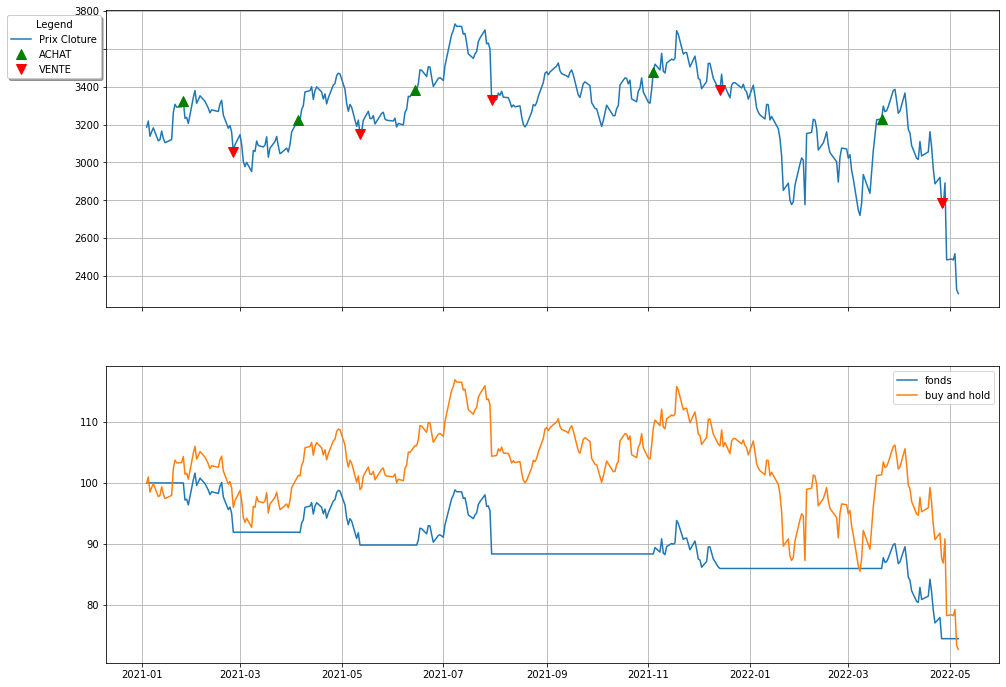

In [13]:
strategie_tortue = lambda x: grisbi.strategie_tortue(x)
dt = grisbi.backtest(df,strategie=strategie_tortue, startDate="2021-01-01")



In [14]:
dt

,Open,High,Low,Close,Adj Close,Volume,min,max,recommandation,amount0,fonds,value,position
Date,,,,,,,,,,,,,
2021-01-04,3270.000000,3272.000000,3144.020020,3186.629883,3186.629883,4411400,3098.389893,3322.000000,0,100000.000000,100000.000000,NaN,0
2021-01-05,3166.010010,3223.379883,3165.060059,3218.510010,3218.510010,2655500,3098.389893,3322.000000,0,100988.283936,100000.000000,NaN,0
2021-01-06,3146.479980,3197.510010,3131.159912,3138.379883,3138.379883,4394800,3101.489990,3322.000000,0,98504.250000,100000.000000,NaN,0
2021-01-07,3157.000000,3208.540039,3155.000000,3162.159912,3162.159912,3514500,3101.489990,3322.000000,0,99241.430908,100000.000000,NaN,0
2021-01-08,3180.000000,3190.639893,3142.199951,3182.699951,3182.699951,3537700,3101.489990,3322.000000,0,99878.172119,100000.000000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,2448.020020,2493.360107,2367.500000,2490.000000,2490.000000,7439400,2485.629883,3386.300049,0,78404.473633,74501.990723,NaN,0
2022-05-03,2481.070068,2524.409912,2456.500000,2485.070068,2485.070068,3956700,2485.629883,3386.300049,-1,78251.645752,74501.990723,NaN,0
2022-05-04,2472.000000,2520.000000,2383.659912,2518.570068,2518.570068,5537300,2485.070068,3386.300049,0,79290.145752,74501.990723,NaN,0


<AxesSubplot:xlabel='Date'>

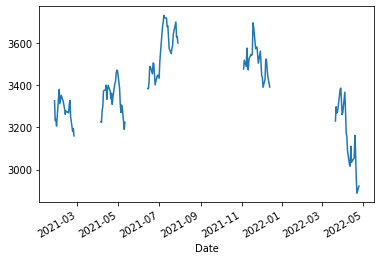

In [15]:

dt["value"].plot()


In [16]:
def drawdown_function(serie):

  # We compute Cumsum of the returns
  cum = serie.dropna().cumsum()+1

  # We compute max of the cumsum on the period (accumulate max)
  running_max = np.maximum.accumulate(cum)

  # We compute drawdown
  drawdown  = cum/running_max - 1 
  return drawdown

nan


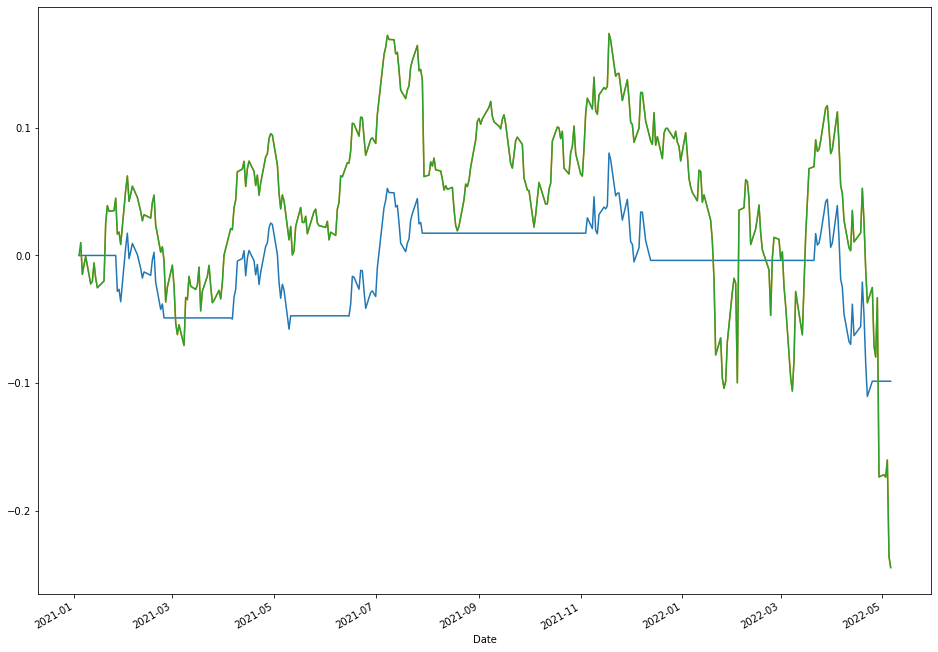

In [17]:
dt['daily_return'] = (dt['value'] / dt['value'].shift(1)) - 1
dt['daily_return2'] = (dt['Close'] / dt['Close'].shift(1)) - 1
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))

dt["daily_return"].fillna(0).cumsum().plot(label='strategie')
dt["Close"].pct_change(1).cumsum().plot(label='stock')
dt["daily_return2"].fillna(0).cumsum().plot(label='stock2')

import numpy as np
a = 3 / np.nan
print(3+np.nan)

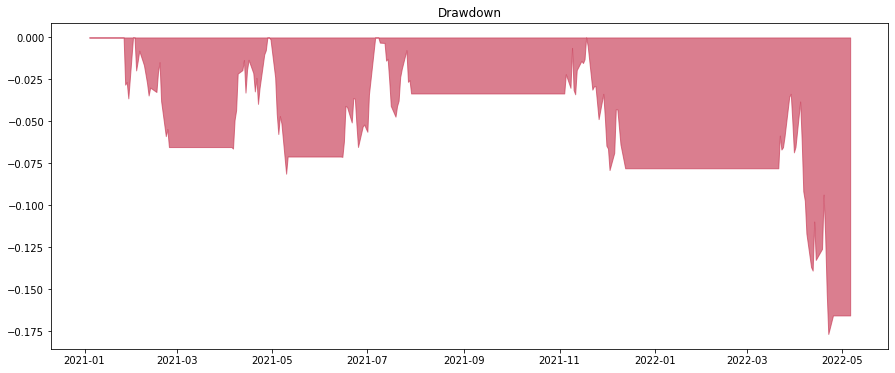

In [18]:
drawdown = drawdown_function(dt["daily_return"].fillna(0))

# Adapt figure size
plt.figure(figsize=(15,6))

# Plot the drawdown
plt.fill_between(drawdown.index,0,drawdown, color="#C73954", alpha=0.65)

# Put a title
plt.title(f"Drawdown")
plt.show()